In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

In [2]:
%run 103-data_preprocessing.py

In [3]:
# load the model from disk
modelXGB = pickle.load(open(os.path.join(path_y_t2, 'best_model_v1.pkl'), 'rb'))

In [6]:
y_pred = modelXGB.predict(X_valid_t2)
# y_pred_proba = modelXGB.predict_proba(X_valid)[::,1]

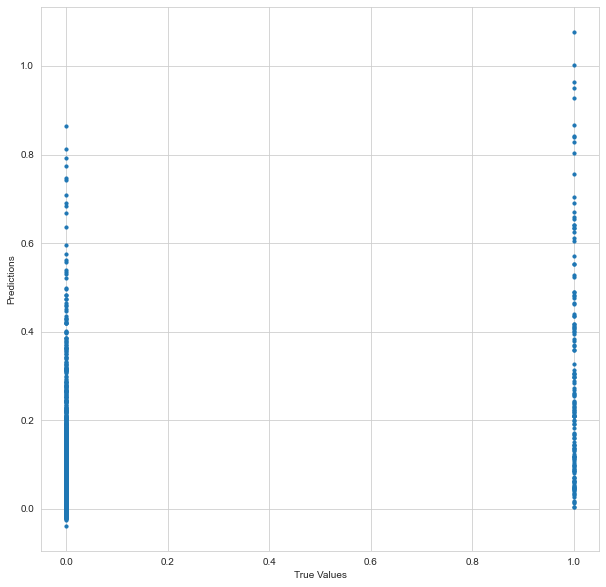

In [10]:
## plot graph to evaluate the model
plt.figure(figsize=(10, 10))
plt.scatter(y_valid_t2, y_pred, s=10)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [12]:
## pred the test data and save it
y_pred_test = modelXGB.predict(X_test_t2)
y_pred_test = pd.DataFrame(y_pred_test, columns=['Predicted'])

X_test_1 = pd.read_csv(os.path.join(path_X, 'X_test.csv'), index_col=[0], header=[0,1,2])
y_pred_test.index = X_test_1.index # set the index
y_pred_test.reset_index(inplace=True) # reset the index
y_pred_test.rename({'index':'Id'}, axis=1, inplace=True) # rename the index column
y_pred_test.to_csv(os.path.join(path_y_t2, 'y_test_v1.csv'), index=False)